In [1]:
import os
import pandas as pd
from urllib.parse import parse_qs
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
type_exp = [
    "placeholder",
    "randomExamples",
    "dynamic",
    "dynamicPlaceholder",
    "EmbeddedPlaceholder",
    "TFIDFPlaceholder",
]
# type_exp = ["dynamicPlaceholder"]
benchmarks = ["libraries", "cedar", "dafnyVMC"]
# benchmarks = ["libraries"]
# benchmarks = ["libraries", "dafnyVMC"]
# Initialize an array to store the cumulative successes for all indices
successes_data = {}
overall_data = {}
for benchmark in benchmarks:
    for method in type_exp:
        df = pd.DataFrame()
        for i in range(58):
            # print(
            #     f"Reading file {i}: ../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
            # )
            if os.path.exists(
                # f"../results_llm/tmp_{benchmark}/output_{method}_{benchmark}_{i}.csv"
                f"../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
            ):
                df_temp = pd.read_csv(
                    f"../results_llm/tmp_{benchmark}/output_{method}-r3_{benchmark}_{i}.csv"
                )
                df_temp["Index"] = i
                df = pd.concat([df, df_temp], ignore_index=True)
        # print(df.shape)
        overall_data[(method, benchmark)] = df

        cumulative_successes = []
        # Iterate over the range of tries
        for try_number in range(11):
            # Get the successes for the current try and all previous tries
            # print(f"benchmark: {benchmark}, method: {method}, try: {try_number}")
            successes = df[
                (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
            ]
            # Count the number of unique indices that were successful
            cumulative_successes.append(successes["Index"].nunique())
            # print(
            #     f"cumulative_successes[{method}, {benchmark}, {try_number}] = {cumulative_successes}"
            # )

            successes_data[(method, benchmark)] = cumulative_successes

# print(cumulative_successes)

normalized_cumulative_success = {}

total_successes = {}
total_task = 0
total_task_per_benchmark = {}
seen = []
lengths = {"libraries": 58, "cedar": 54, "dafnyVMC": 33}
for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = overall_data[(method, benchmark)]["Index"].nunique()
    print(total_indices)
    total_indices = lengths[benchmark]
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]
    if benchmark not in seen:
        total_task_per_benchmark[benchmark] = total_indices
        total_task += total_indices
        seen.append(benchmark)
    if method not in total_successes:
        total_successes[method] = cumulative_successes
    else:
        total_successes[method] = [
            x + y for x, y in zip(total_successes[method], cumulative_successes)
        ]
    print(
        f"normalized_cumulative_success[{method}, {benchmark}] = {normalized_cumulative_success[(method, benchmark)]}"
    )


print(total_successes)
print(total_task)
for method in total_successes:
    total_successes[method] = [100.0 * x / total_task for x in total_successes[method]]
print(total_successes)

/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

50
normalized_cumulative_success[placeholder, libraries] = [0.0, 34.48275862068966, 41.37931034482759, 44.827586206896555, 44.827586206896555, 44.827586206896555, 44.827586206896555, 44.827586206896555, 46.55172413793103, 46.55172413793103, 46.55172413793103]
50
normalized_cumulative_success[randomExamples, libraries] = [0.0, 39.6551724137931, 41.37931034482759, 44.827586206896555, 46.55172413793103, 50.0, 51.724137931034484, 51.724137931034484, 51.724137931034484, 53.44827586206897, 53.44827586206897]
57
normalized_cumulative_success[dynamic, libraries] = [0.0, 31.03448275862069, 41.37931034482759, 41.37931034482759, 44.827586206896555, 46.55172413793103, 48.275862068965516, 50.0, 51.724137931034484, 51.724137931034484, 51.724137931034484]
50
normalized_cumulative_success[dynamicPlaceholder, libraries] = [0.0, 44.827586206896555, 46.55172413793103, 48.275862068965516, 53.44827586206897, 56.89655172413793, 56.89655172413793, 56.89655172413793, 56.89655172413793, 56.89655172413793, 60.3

/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_temp], ignore_index=True)
/tmp/ipykernel_2018934/2319502702.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determinin

In [3]:
print(normalized_cumulative_success)

{('placeholder', 'libraries'): [0.0, 34.48275862068966, 41.37931034482759, 44.827586206896555, 44.827586206896555, 44.827586206896555, 44.827586206896555, 44.827586206896555, 46.55172413793103, 46.55172413793103, 46.55172413793103], ('randomExamples', 'libraries'): [0.0, 39.6551724137931, 41.37931034482759, 44.827586206896555, 46.55172413793103, 50.0, 51.724137931034484, 51.724137931034484, 51.724137931034484, 53.44827586206897, 53.44827586206897], ('dynamic', 'libraries'): [0.0, 31.03448275862069, 41.37931034482759, 41.37931034482759, 44.827586206896555, 46.55172413793103, 48.275862068965516, 50.0, 51.724137931034484, 51.724137931034484, 51.724137931034484], ('dynamicPlaceholder', 'libraries'): [0.0, 44.827586206896555, 46.55172413793103, 48.275862068965516, 53.44827586206897, 56.89655172413793, 56.89655172413793, 56.89655172413793, 56.89655172413793, 56.89655172413793, 60.3448275862069], ('EmbeddedPlaceholder', 'libraries'): [0.0, 41.37931034482759, 46.55172413793103, 48.275862068965

In [4]:
# print last element of "randomExamples", "EmbedddedPlaceholder", "TFIDFPlaceholder", "dynamicPlaceholder"
print(normalized_cumulative_success[("randomExamples", "libraries")][-1])
for benchmark in benchmarks:
    for method in [
        "randomExamples",
        "EmbeddedPlaceholder",
        "TFIDFPlaceholder",
        "dynamicPlaceholder",
    ]:
        print(
            f"normalized_cumulative_success[{method}, {benchmark}] = {normalized_cumulative_success[(method, benchmark)][-1]}"
        )

53.44827586206897
normalized_cumulative_success[randomExamples, libraries] = 53.44827586206897
normalized_cumulative_success[EmbeddedPlaceholder, libraries] = 55.172413793103445
normalized_cumulative_success[TFIDFPlaceholder, libraries] = 56.89655172413793
normalized_cumulative_success[dynamicPlaceholder, libraries] = 60.3448275862069
normalized_cumulative_success[randomExamples, cedar] = 53.7037037037037
normalized_cumulative_success[EmbeddedPlaceholder, cedar] = 61.111111111111114
normalized_cumulative_success[TFIDFPlaceholder, cedar] = 51.851851851851855
normalized_cumulative_success[dynamicPlaceholder, cedar] = 59.25925925925926
normalized_cumulative_success[randomExamples, dafnyVMC] = 45.45454545454545
normalized_cumulative_success[EmbeddedPlaceholder, dafnyVMC] = 45.45454545454545
normalized_cumulative_success[TFIDFPlaceholder, dafnyVMC] = 51.515151515151516
normalized_cumulative_success[dynamicPlaceholder, dafnyVMC] = 45.45454545454545


In [5]:
print(total_task)

145


In [6]:
for method in total_successes:
    print(f"total_successes[{method}] = {total_successes[method][-1]}")

print("Total task: ", total_task)
print("Total task per benchmark: ", total_task_per_benchmark)

# Check that the total correspond when taking the sum of the normalized cumulative successes
weighted_success_embedded = (
    normalized_cumulative_success[("EmbeddedPlaceholder", "libraries")][-1]
    * total_task_per_benchmark["libraries"]
    + normalized_cumulative_success[("EmbeddedPlaceholder", "cedar")][-1]
    * total_task_per_benchmark["cedar"]
    + normalized_cumulative_success[("EmbeddedPlaceholder", "dafnyVMC")][-1]
    * total_task_per_benchmark["dafnyVMC"]
)
weighted_success_dynamicPlaceholder = (
    normalized_cumulative_success[("dynamicPlaceholder", "libraries")][-1]
    * total_task_per_benchmark["libraries"]
    + normalized_cumulative_success[("dynamicPlaceholder", "cedar")][-1]
    * total_task_per_benchmark["cedar"]
    + normalized_cumulative_success[("dynamicPlaceholder", "dafnyVMC")][-1]
    * total_task_per_benchmark["dafnyVMC"]
)
weighted_success_tfidf = (
    normalized_cumulative_success[("TFIDFPlaceholder", "libraries")][-1]
    * total_task_per_benchmark["libraries"]
    + normalized_cumulative_success[("TFIDFPlaceholder", "cedar")][-1]
    * total_task_per_benchmark["cedar"]
    + normalized_cumulative_success[("TFIDFPlaceholder", "dafnyVMC")][-1]
    * total_task_per_benchmark["dafnyVMC"]
)
print(f"Total success for tfidf: {weighted_success_tfidf/total_task}")
print(
    f"Total success for dynamicPlaceholder: {weighted_success_dynamicPlaceholder/total_task}"
)
print(f"Total success for EmbeddedPlaceholder: {weighted_success_embedded/total_task}")

total_successes[placeholder] = 35.172413793103445
total_successes[randomExamples] = 51.724137931034484
total_successes[dynamic] = 46.89655172413793
total_successes[dynamicPlaceholder] = 56.55172413793103
total_successes[EmbeddedPlaceholder] = 55.172413793103445
total_successes[TFIDFPlaceholder] = 53.793103448275865
Total task:  145
Total task per benchmark:  {'libraries': 58, 'cedar': 54, 'dafnyVMC': 33}
Total success for tfidf: 53.793103448275865
Total success for dynamicPlaceholder: 56.55172413793103
Total success for EmbeddedPlaceholder: 55.172413793103445


In [7]:
print(f"cumulative_successes: {cumulative_successes}")

cumulative_successes: [0, 13, 14, 15, 15, 15, 16, 16, 16, 16, 17]


{'dynamic': 'c', 'placeholder': 'g', 'randomExamples': 'm', 'dynamicPlaceholder': 'y'}


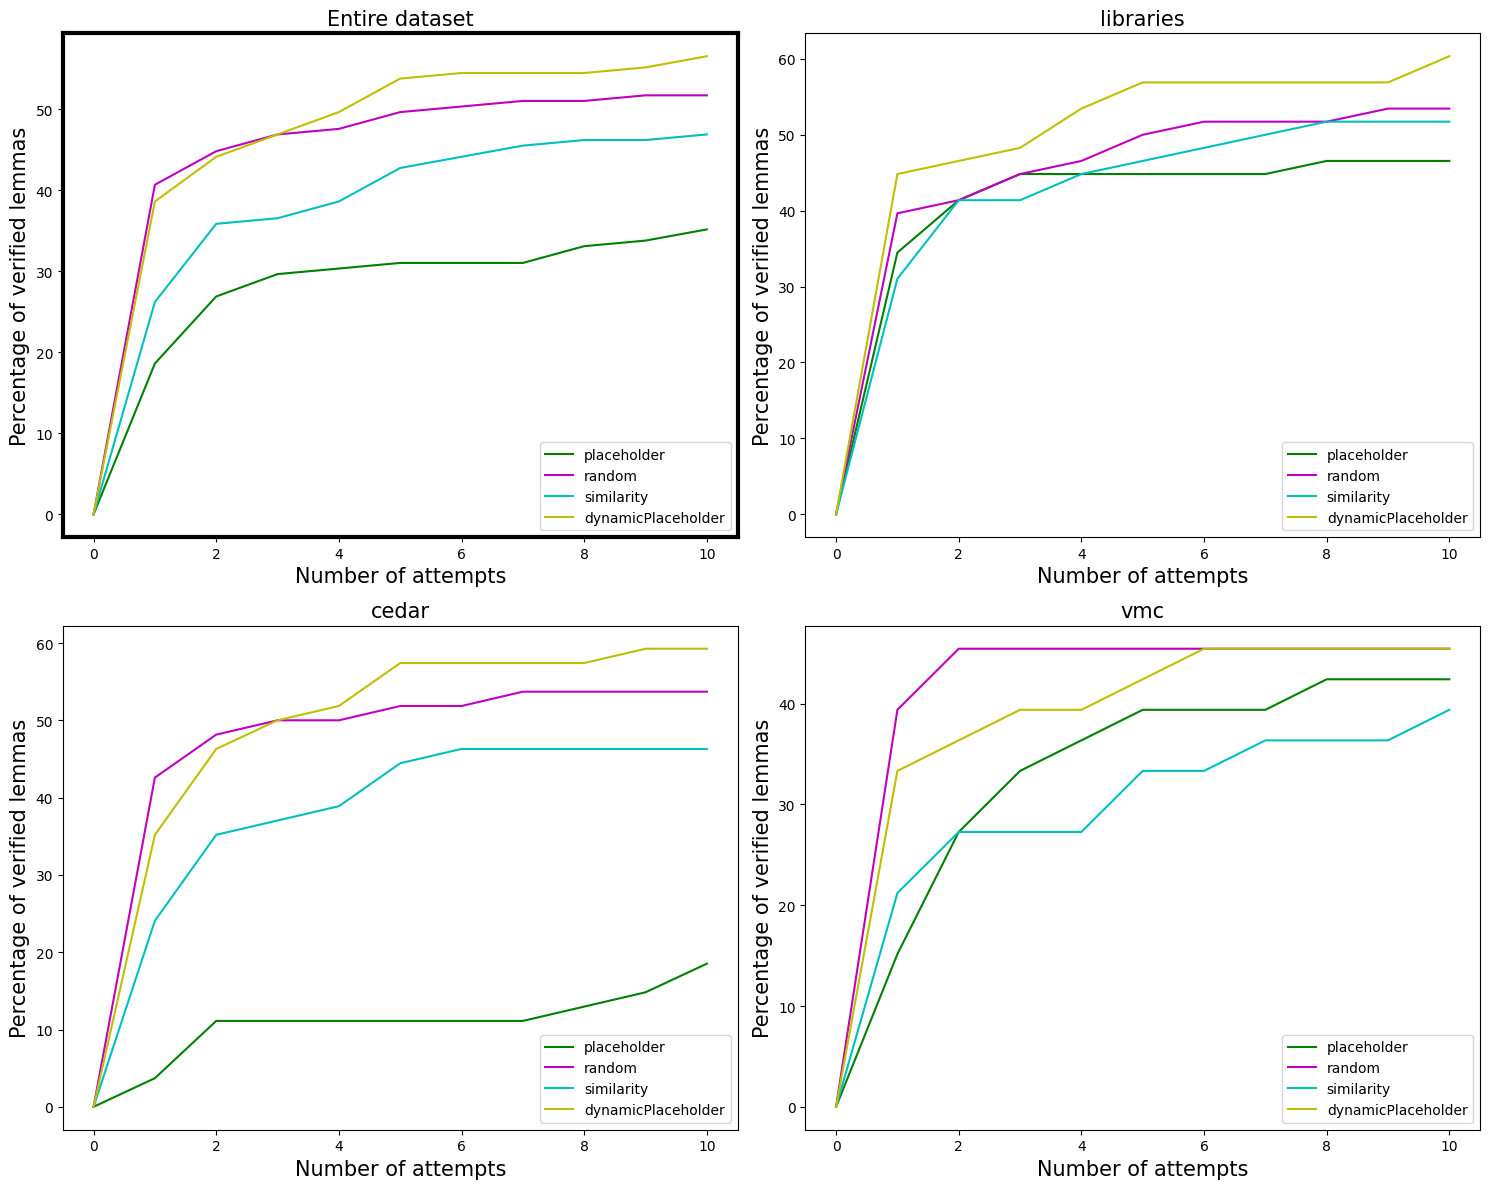

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
colors = ["c", "g", "m", "y", "k", "r"]
color_map = {
    method: colors[i % len(colors)]
    for i, method in enumerate(
        ["dynamic", "placeholder", "randomExamples", "dynamicPlaceholder"]
    )
}
type_exp = ["placeholder", "randomExamples", "dynamic", "dynamicPlaceholder"]
print(color_map)
axs = axs.flatten()

i = 1
for benchmark in benchmarks:
    # axs[i](figsize=(10, 6))
    for method in type_exp:
        data = normalized_cumulative_success[(method, benchmark)]
        method_name = method
        if method == "randomExamples":
            method_name = "random"
        if method == "dynamic":
            method_name = "similarity"
        axs[i].plot(data, label=method_name, color=color_map[method])
        benchmark_name = benchmark
        if benchmark == "dafnyVMC":
            benchmark_name = "vmc"
        axs[i].set_title(f"{benchmark_name}", fontsize=15)
        axs[i].set_xlabel("Number of attempts", fontsize=15)
        axs[i].legend(loc="lower right", fontsize=10)
        axs[i].set_ylabel("Percentage of verified lemmas", fontsize=15)
        # axs[i].legend()
    i += 1
for method, data in total_successes.items():
    if method in type_exp:
        method_name = method
        if method == "randomExamples":
            method_name = "random"
        if method == "dynamic":
            method_name = "similarity-no-placeholder"
        if method == "dynamicPlaceholder":
            method_name = "dynamic"
        axs[0].plot(data, label=method_name, color=color_map[method])
        axs[0].set_title(f"Entire dataset", fontsize=15)
        axs[0].set_xlabel("Number of attempts", fontsize=15)
        axs[0].set_ylabel("Percentage of verified lemmas", fontsize=15)
        axs[0].legend(loc="lower right", fontsize=10)

for spine in axs[0].spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(3)
plt.tight_layout()
plt.savefig("../fig/whole_benchs_similarity.pdf", bbox_inches="tight")
plt.show()
# plt.figure(figsize=(10, 6))
# normalized_cumulative_success_lib = normalized_cumulative_success
# for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
#   data = normalized_cumulative_success[(method, "kfold")]
#   plt.plot(data, label=method)
# plt.title(f'Normalized Cumulative Success for {benchmark}')
# plt.xlabel('Index')
# plt.ylabel('Normalized Cumulative Success (%)')
# plt.legend()
# plt.show()

{'dynamic': 'c', 'placeholder': 'g', 'randomExamples': 'm', 'dynamicPlaceholder': 'y', 'EmbeddedPlaceholder': 'k', 'TFIDFPlaceholder': 'r'}


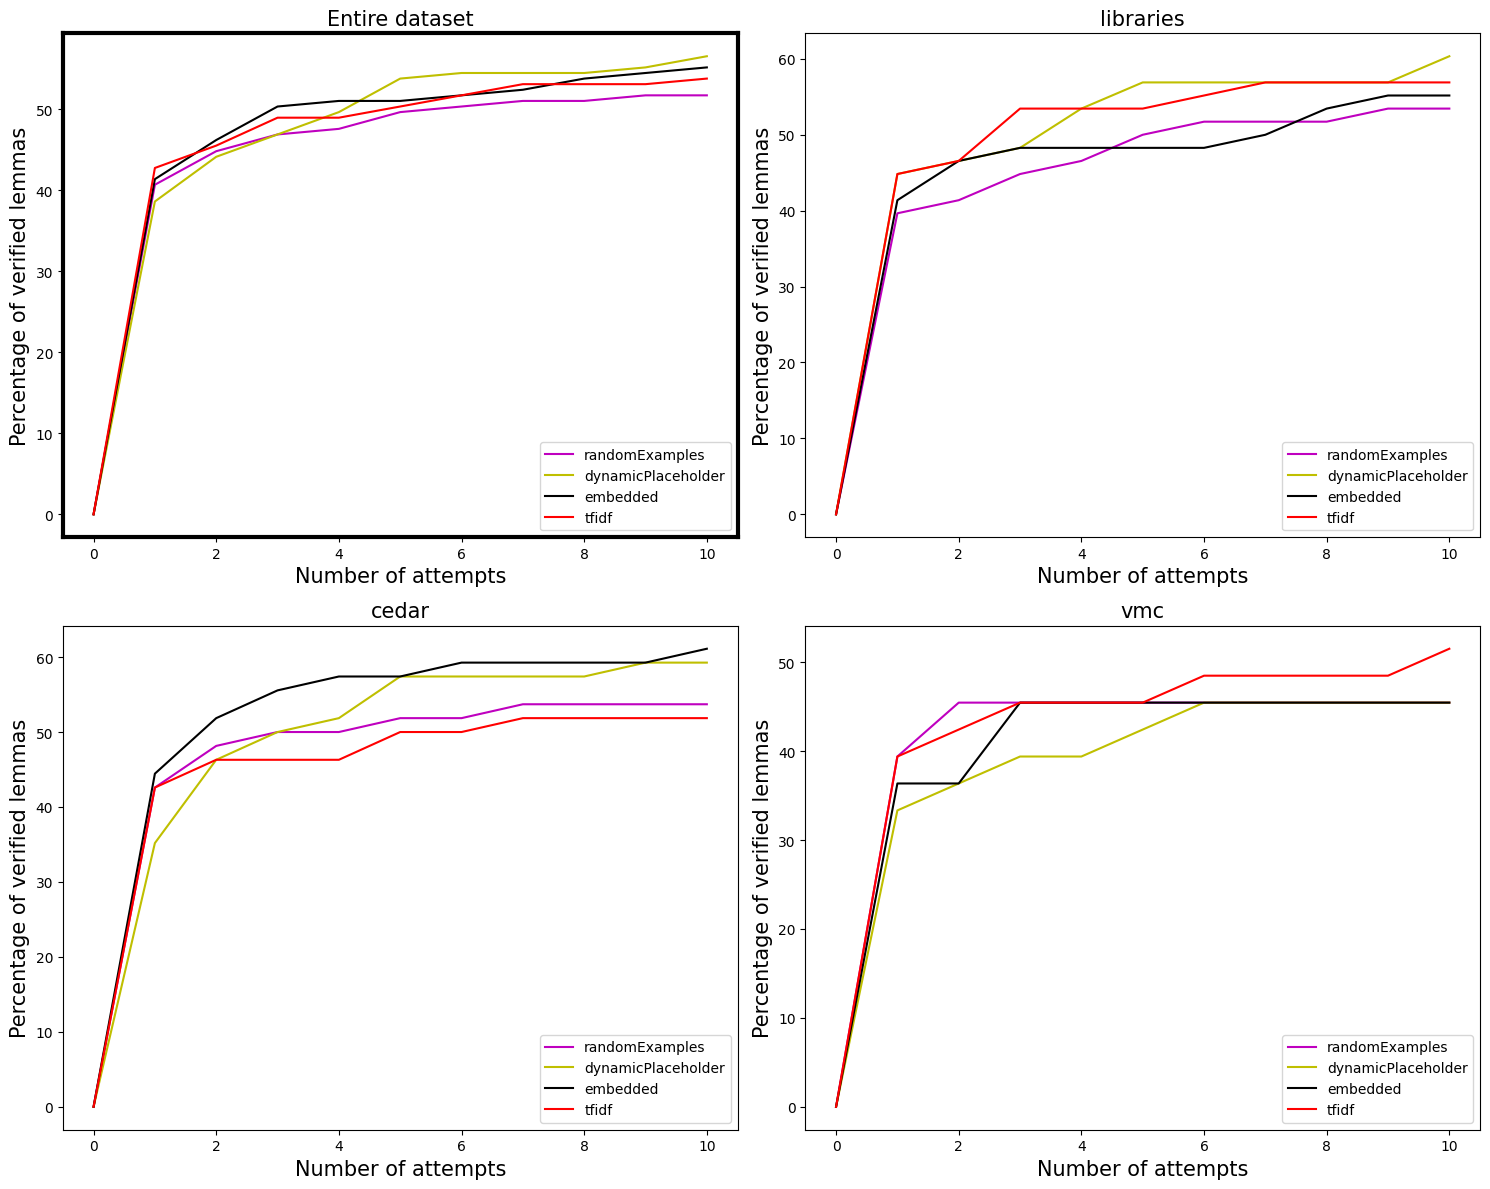

In [9]:
type_exp = [
    "randomExamples",
    "dynamicPlaceholder",
    "EmbeddedPlaceholder",
    "TFIDFPlaceholder",
]
# type_exp = ["placeholder", "randomExamples", "dynamic", "dynamicPlaceholder", "EmbeddedPlaceholder", "TFIDFPlaceholder"]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
colors = ["c", "g", "m", "y", "k", "r"]
color_map = {
    method: colors[i % len(colors)]
    for i, method in enumerate(
        [
            "dynamic",
            "placeholder",
            "randomExamples",
            "dynamicPlaceholder",
            "EmbeddedPlaceholder",
            "TFIDFPlaceholder",
        ]
    )
}
print(color_map)
axs = axs.flatten()

i = 1
for benchmark in benchmarks:
    # axs[i](figsize=(10, 6))
    for method in type_exp:
        data = normalized_cumulative_success[(method, benchmark)]
        method_name = method
        if method == "EmbeddedPlaceholder":
            method_name = "embedded"
        if method == "TFIDFPlaceholder":
            method_name = "tfidf"
        if method == "randomExample":
            method_name = "random"
        if method == "dynamic-r2":
            method_name = "similarity"
        axs[i].plot(data, label=method_name, color=color_map[method])
        benchmark_name = benchmark
        if benchmark == "dafnyVMC":
            benchmark_name = "vmc"
        axs[i].set_title(f"{benchmark_name}", fontsize=15)
        axs[i].set_xlabel("Number of attempts", fontsize=15)
        axs[i].legend(loc="lower right", fontsize=10)
        axs[i].set_ylabel("Percentage of verified lemmas", fontsize=15)
        # axs[i].legend()
    i += 1
for method, data in total_successes.items():
    if method in type_exp:
        method_name = method
        if method == "EmbeddedPlaceholder":
            method_name = "embedded"
        if method == "TFIDFPlaceholder":
            method_name = "tfidf"
        if method == "randomExample":
            method_name = "random"
        if method == "dynamic-r2":
            method_name = "similarity"
        axs[0].plot(data, label=method_name, color=color_map[method])
        axs[0].set_title(f"Entire dataset", fontsize=15)
        axs[0].set_xlabel("Number of attempts", fontsize=15)
        axs[0].set_ylabel("Percentage of verified lemmas", fontsize=15)
        axs[0].legend(loc="lower right", fontsize=10)

for spine in axs[0].spines.values():
    spine.set_edgecolor("black")
    spine.set_linewidth(3)
plt.tight_layout()
plt.savefig("../fig/whole_benchs_similarity.pdf", bbox_inches="tight")
plt.show()

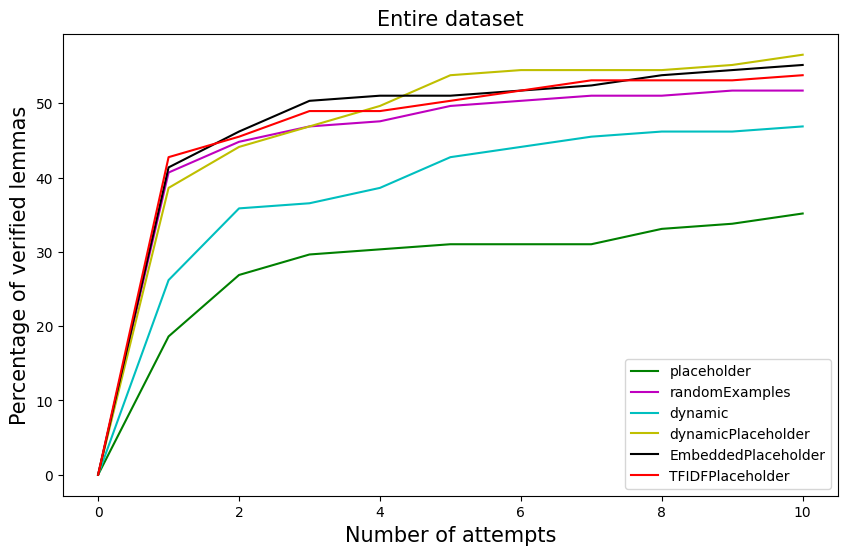

In [10]:
plt.figure(figsize=(10, 6))
for method, data in total_successes.items():
    method_name = method
    if method == "randomExample":
        method_name = "random"
    if method == "dynamic-r2":
        method_name = "similarity"
    plt.plot(data, label=method_name, color=color_map[method])
    plt.title(f"Entire dataset", fontsize=15)
    plt.xlabel("Number of attempts", fontsize=15)
    plt.ylabel("Percentage of verified lemmas", fontsize=15)
    plt.legend(loc="lower right", fontsize=10)
plt.savefig("../fig/entire_similarity.pdf", bbox_inches="tight")

plt.show()

In [11]:
type_exp = ["dynamic", "dynamic-r3", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(53):
        if os.path.exists(f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_cedar/output_{method}_cedar_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    if method == "randomExamples":
        normalized_cumulative_success[("randomExample", benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]
    else:
        normalized_cumulative_success[(method, benchmark)] = [
            100.0 * successes / total_indices for successes in cumulative_successes
        ]

(332, 24)
(333, 26)
(343, 24)
(407, 24)
(343, 24)


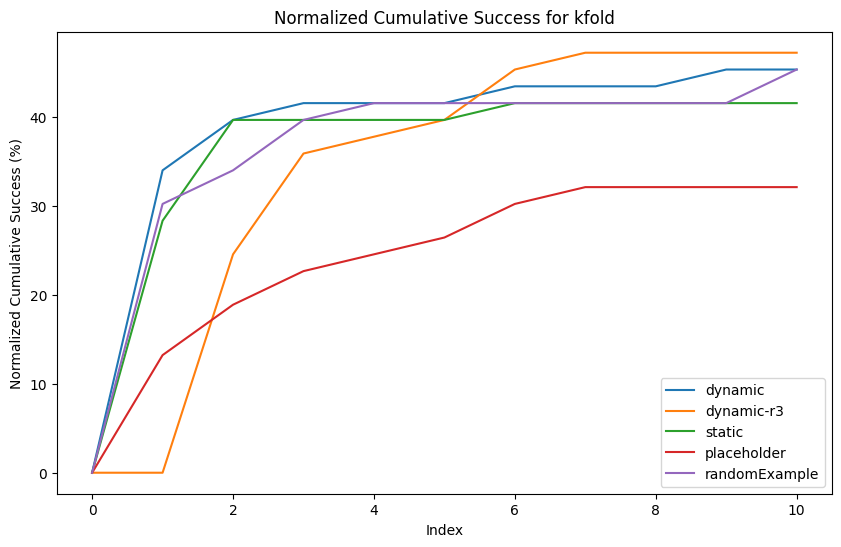

In [12]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_cedar = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [13]:
type_exp = ["dynamic", "dynamic-r2", "static", "placeholder", "randomExample"]

# Initialize an array to store the cumulative successes for all indices
successes_data = {}
for method in type_exp:
    df = pd.DataFrame()
    for i in range(58):
        if os.path.exists(
            f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
        ):
            # print(f"Reading file {i}")
            df_temp = pd.read_csv(
                f"../results_llm/tmp_dafnyVMC/output_{method}_dafnyVMC_{i}.csv"
            )
            df_temp["Index"] = i
            df = pd.concat([df, df_temp], ignore_index=True)
    print(method)
    print(df.shape)

    cumulative_successes = [0 * 10]
    # Iterate over the range of tries
    for try_number in range(10):
        # Get the successes for the current try and all previous tries
        successes = df[
            (df["New Method Result"] == "Correct") & (df["Try"] <= try_number)
        ]
        # Count the number of unique indices that were successful
        cumulative_successes.append(successes["Index"].nunique())

        successes_data[(method, "kfold")] = cumulative_successes

normalized_cumulative_success = {}

for (method, benchmark), cumulative_successes in successes_data.items():
    # Normalize the cumulative successes
    total_indices = df["Index"].nunique()
    normalized_cumulative_success[(method, benchmark)] = [
        100.0 * successes / total_indices for successes in cumulative_successes
    ]

dynamic
(206, 24)
dynamic-r2
(195, 24)
static
(200, 24)
placeholder
(268, 24)
randomExample
(0, 0)


KeyError: 'New Method Result'

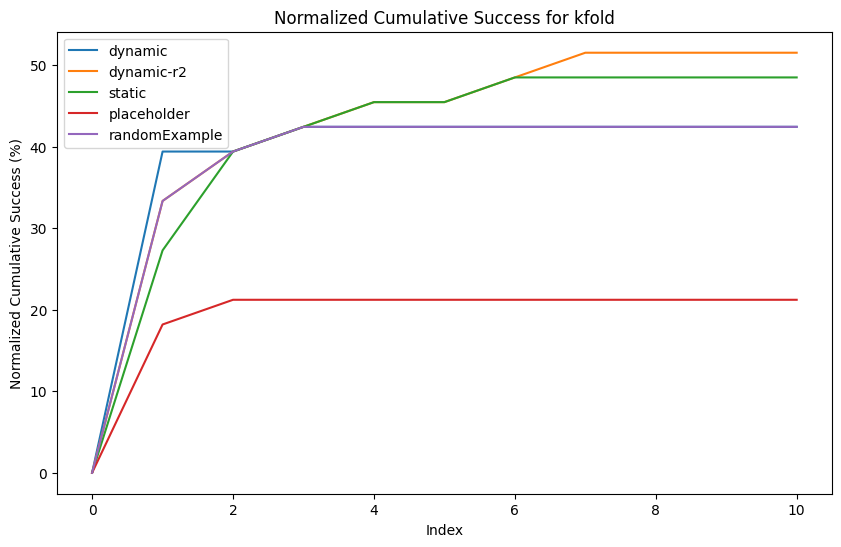

In [ ]:
plt.figure(figsize=(10, 6))
normalized_cumulative_success_dafnyVMC = normalized_cumulative_success
for (method, benchmark), cumulative_successes in normalized_cumulative_success.items():
    data = normalized_cumulative_success[(method, "kfold")]
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()

In [ ]:
total_normalized_cumulative_success = {}
for (
    method,
    benchmark,
), cumulative_successes in normalized_cumulative_success_cedar.items():
    # compute the mean over the 3 benchmarks
    total_normalized_cumulative_success[method] = [
        (
            normalized_cumulative_success_lib[(method, "kfold")][i]
            + normalized_cumulative_success_cedar[(method, "kfold")][i]
            + normalized_cumulative_success_dafnyVMC[(method, "kfold")][i]
        )
        / 3
        for i in range(11)
    ]
print(total_normalized_cumulative_success)

{'dynamic': [0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044], 'static': [0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214], 'placeholder': [0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274], 'randomExample': [0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]}


[0.0, 34.76874003189793, 40.714159135211766, 45.26552070411719, 45.26552070411719, 45.26552070411719, 47.05239529800932, 47.05239529800932, 47.05239529800932, 47.66967924862661, 48.254474570264044]
[0.0, 30.630870104554315, 39.544568491936914, 41.724260145312776, 42.73436115541379, 43.319156477051216, 44.94654143776952, 45.53133675940694, 46.70092740268179, 46.70092740268179, 47.285722724319214]
[0.0, 19.15352353948845, 26.109043652903306, 27.928406875775295, 28.545690826392576, 29.162974777009868, 31.567133321519282, 33.93880323704885, 33.93880323704885, 34.523598558686274, 34.523598558686274]
[0.0, 35.0227420402859, 39.44710260499734, 43.478646110225064, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 44.68072538247977, 45.26552070411719, 47.084883926989185]


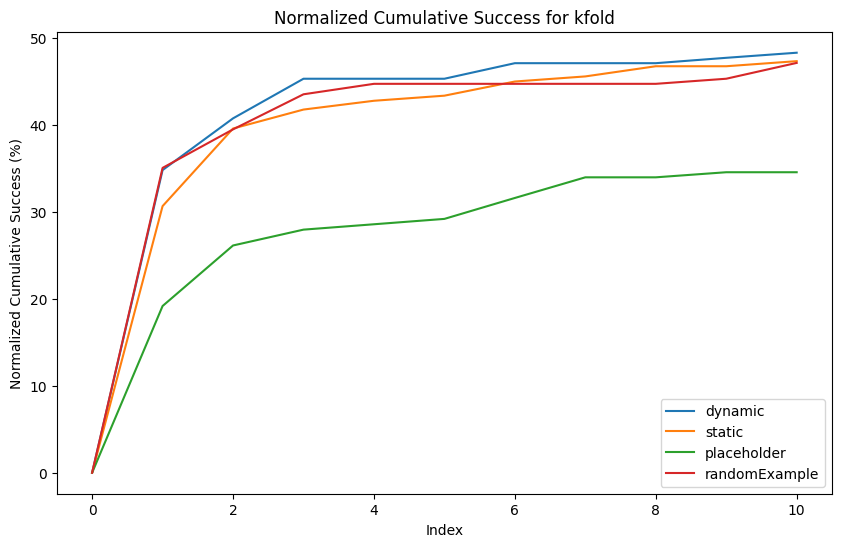

In [ ]:
plt.figure(figsize=(10, 6))
for method, cumulative_successes in total_normalized_cumulative_success.items():
    data = total_normalized_cumulative_success[method]
    print(data)
    plt.plot(data, label=method)
plt.title(f"Normalized Cumulative Success for {benchmark}")
plt.xlabel("Index")
plt.ylabel("Normalized Cumulative Success (%)")
plt.legend()
plt.show()